In [30]:
name = "Benjamin Ellsworth"
print "My name is %s" % (name)

My name is Benjamin Ellsworth


# Predicting the weather

***For all of the questions in this project, assume that 1 month = 30 days.***

## Problem 1 (20 pts)

Suppose there is a 20% chance it will rain on any given day in a month. What are the odds that that rains on one and only one day in a month. 

Work this problem out a*nalytically* (with pen and paper, using a formula) and write it up in your final document.

Here you should solve the same problem *numerically* using a Monte Carlo approach, similar to how we approached the birthday problem in class. 

Make sure that both approaches give you a similar result. 

In [31]:
#############Analytically #############################
x = 30 * (.20*(.80**29)) * 100
print x

#######################################################

0.928455029464


In [32]:
import numpy as np
####################### FUNCTION ############################
def rain():
    days = 30
    total = 0
    for i in range(0, days):
        rainfall = np.random.random()
        if rainfall >=0 and rainfall < .20:
            total += 1.0
    if total == 1:
        return True
    else:
        return False
    
#############################################################

######## LOOPING THE FUNCTION ###############################
nmonths = 100000
percentage = 0
for i in range(0, nmonths):
    if rain() == True:
        percentage += 1
final_percent = percentage/float(nmonths) *100
#############################################################    
    
# final_percent = percentage/nmonths * 100.
print "There is a %.6f percent chance that it will rain on one and only one day in a given month." % final_percent
    


There is a 0.946000 percent chance that it will rain on one and only one day in a given month.


## Problem 2 (20 pts)

Suppose there is a 10% chance that it will rain on any given day in a month. What are the odds that it rains at least 8 days (in any order) that month?

Work this problem out *numerically* using a Monte Carlo approach. 

In [33]:


############### FUNCTION ##################################
def rain8days():
    total = 0 
    days = 30
    for i in range(0, days):
        rainfall = np.random.random()
        if rainfall >=0 and rainfall < .10:
            total += 1.0
    return total
###########################################################

#####################LOOP##################################
nmonths = 100000

total = 0
for i in range(0, nmonths):
    if rain8days() >= 8:
        total += 1.0
        
percent = total/nmonths * 100
print "There is a %.4f percent chance that it will rain at least 8 days in a given month. " % percent
        

###########################################################
    

There is a 0.7880 percent chance that it will rain at least 8 days in a given month. 


## Problem 3 

### 3a (20 pts)

Suppose that if it rains one day, the odds of a certain amount of rainfall *on that day* are

* 1 cm   20%
* 2 cm   30%
* 3 cm   30%
* 4 cm   10%
* 5 cm   10%

However the odds of it raining are dependent on if it rained the day before.

* If it is the first day of the month, there is a 10% chance of rain.
* If it rained 1 day before, but not 2 days before, there is a 20% chance of rain. 
* If it rained both of the 2 days before, but not the 3rd day before, there is a 25% chance of rain.
* If it rained for the 3 days (or more) before, there is a 5% chance of rain. 
* Otherwise, there is a 10% chance of rain

What are the odds that there are at least 10 cm of rain in a given month?

Work this problem out using a Monte Carlo approach. 

In [34]:
########################################################################
import numpy as np
def rain_calculator():
    
    days = 30
    rainfall = 0
    
    
    for day in range(0,days):
        x =  np.random.random()
        
        rain = False
       
        if day==1:
            
            if x >=0 and x < .10:
                rain = True
        
        elif day > 1 and day-1== True and day-2== False:
            
            if x >=0 and x < .20:
                rain = True
        
        elif day > 2 and day-1 == True and day-2==True and day-3== False:
                 
            if x >=0 and x < .25:
                rain = True
        
        elif day > 2 and day-1==True and day-2==True and day-3==True:
                 
            if x >=0 and x < .05:
                rain = True
        
        else:
                 
            if x >=0 and x < .10:
                rain = True
    

        if rain == True:
            y = np.random.random()
            
            if y >=0 and y < .20:
                rainfall += 1

            elif y >=.20 and y < .50:
                rainfall += 2

            elif y >=.50 and y < .80:
                rainfall += 3

            elif y >=.80 and y < .90:
                rainfall += 4

            elif y >=.90 and y < 1.0:
                rainfall += 5
    
#         print rainfall
    return rainfall
# print rain_calculator()


total = 0
nmonths = 10000
for i in range(0,nmonths):
    if rain_calculator() >= 10:
        total += 1.0
chance = total/nmonths * 100
print "There is a %.3f chance it will rain at least 10cm in a given month." % chance

There is a 34.810 chance it will rain at least 10cm in a given month.


### 3b (10 pts)

Make a histogram of the distribtion of expected rainfall values. You can get this from your Monte Carlo trials. 

Make sure you label everything clearly. 

<IPython.core.display.Javascript object>


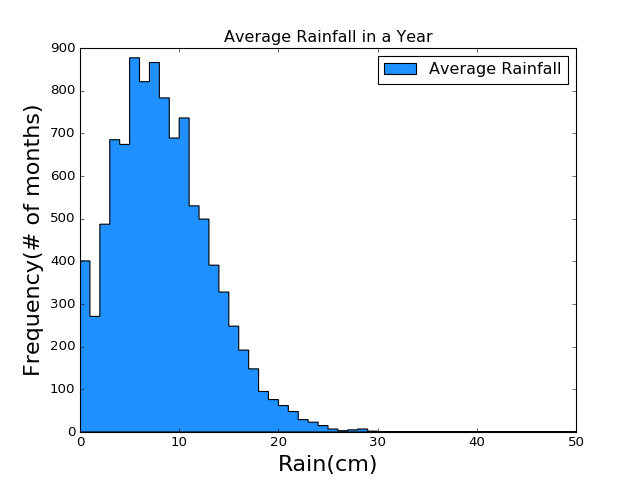

In [35]:
nmonths = 10000
rainfall = []
for i in range(0,nmonths):
    x = rain_calculator()
    rainfall.append(x)
# print rainfall



import numpy as np
import matplotlib.pylab as plt
%matplotlib notebook

plt.figure()
plt.hist(rainfall, bins=50, range= (0,50), color='dodgerblue',histtype='stepfilled',label='Average Rainfall', alpha=1)
plt.xlabel("Rain(cm)", fontsize=20 )
plt.ylabel("Frequency(# of months)", fontsize=20)
plt.title("Average Rainfall in a Year")
plt.legend(numpoints=1)
plt.savefig('avg_rain_graph.png')

### 3c (10 pts)

What is the average amount of rain to fall in any given month? 



In [36]:
# Your code here?
total = 0
for i in range(0,nmonths):
    total += float(rain_calculator())
    
    
avg = total/nmonths
print "The average rain to fall in a given month is %.1f cm" % avg

The average rain to fall in a given month is 8.0 cm


### 3d (20)

Once you find the average value, someone might ask you for the uncertainty (some people also refer to uncertainty as the "*error*") on your prediction. That can be tricky to calculate, so often what is given is just a *range* of possible values. "We estimate the rainfall to be between X cm and Y cm." The question is, how to decide what that range is. 

The way this is often done is to find the middle 95% of the trial values (from your Monte Carlo run) and then use the low-edge and the high-edge of that range. If you're concerned about the middle 95%, then 2.5% of the values are below them and 2.5% of all the values are above them. The rainfall values at those edges are what you use for the ranges to quote. 

This is what people mean when they say, "I'm 95% confident that the rainfall will be between X and Y", and when you write it up for the LaTeX document, you should also quote it this way. 

*Hint!* This part becomes much easier if you sort all the values using any of the numpy/Python sort functions you can read about online. When you sort them, you should be able to find what rainfall is at the edge for the lower 2.5% and the higher 2.5%. 

In [37]:
# Your code here
x = sorted(rainfall)
# print x

### What is 2.5% of 10000 ??#########
q = 2.5 / 100
t = q * nmonths
print t
#####################################
remove = []
for i in range(0, 250):
    remove.append(x[i])
    
for i in range(nmonths-250, nmonths):
    remove.append(x[i])
    
print x, len(x)
print remove


250.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [38]:
print "I am 95% confident that it will rain between 0cm and 19cm per month."

I am 95% confident that it will rain between 0cm and 19cm per month.
